# SARIMA
- about SARIMA: https://ai-trend.jp/basic-study/time-series-analysis/sarima_model/
- data: https://www.mhlw.go.jp/stf/covid-19/open-data.html

## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-02-22 16:32:51--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 13.33.210.126, 13.33.210.24, 13.33.210.11, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|13.33.210.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105379 (103K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 102.91K  --.-KB/s    in 0.08s   

2022-02-22 16:32:52 (1.28 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [105379/105379]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(768, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-17,95143,3628,455,277,906,201,257,374,1513,915,...,279,271,4332,453,362,676,378,269,598,702
2022-02-18,87663,2656,590,242,782,216,188,364,1500,774,...,209,222,3738,396,382,707,312,227,483,681
2022-02-19,81576,2797,508,249,836,228,231,325,1527,854,...,216,214,3454,419,370,733,309,215,466,666
2022-02-20,71423,2334,245,270,695,164,196,286,1525,652,...,213,169,3189,204,258,470,230,207,388,527
2022-02-21,51930,1924,357,213,402,118,129,204,1204,371,...,151,90,2442,306,203,425,243,158,293,315


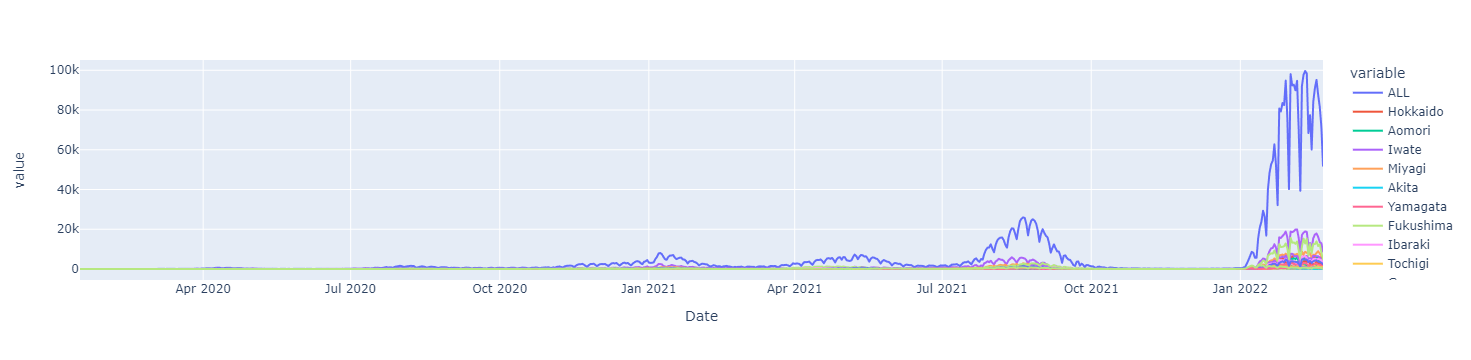

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(110, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-23,46725.000000,1226.857143,186.857143,30.142857,186.000000,50.000000,61.285714,87.714286,641.285714,341.000000,...,225.285714,53.571429,1989.142857,225.428571,343.142857,600.428571,226.142857,243.285714,258.285714,1178.000000
2022-01-30,75534.285714,2217.857143,257.714286,118.000000,452.285714,200.857143,177.857143,302.857143,990.285714,583.857143,...,282.571429,139.142857,3449.285714,363.142857,391.571429,836.428571,342.571429,378.285714,479.142857,996.428571
2022-02-06,82612.142857,2809.142857,305.285714,148.000000,611.285714,188.142857,237.000000,481.571429,1372.714286,628.714286,...,251.857143,217.000000,3259.142857,482.142857,373.142857,594.571429,402.714286,334.428571,561.285714,641.857143
2022-02-13,81848.142857,3129.714286,373.857143,162.000000,673.000000,185.571429,183.714286,412.285714,1360.428571,687.142857,...,210.285714,243.428571,4024.857143,427.000000,401.857143,745.285714,399.000000,260.142857,529.000000,560.428571
2022-02-20,81582.714286,2680.571429,411.857143,222.428571,748.000000,192.142857,206.714286,353.571429,1306.000000,851.428571,...,226.571429,220.000000,3687.142857,410.285714,383.571429,700.857143,321.428571,219.142857,506.714286,606.142857


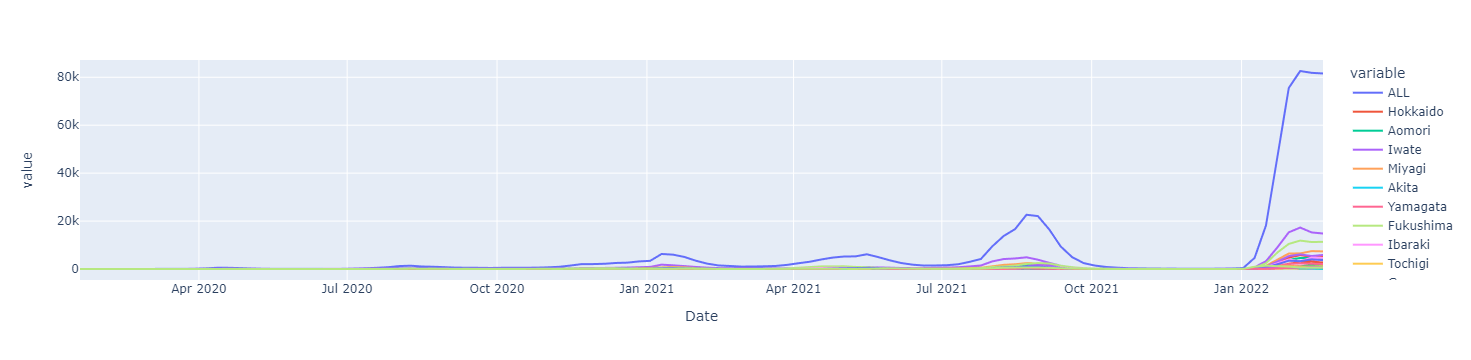

In [7]:
px.line(df_gr,)

## functions

In [8]:
import itertools

# 各パラメータの範囲を決める
p = d = q = range(1, 2)
P = D = Q = range(1, 2)
s = range(4, 32)

# p, d, q　の組み合わせを列挙するリストを作成
pdq = list(itertools.product(p, d, q))
# P, D, Q　の組み合わせを列挙するリストを作成すると同時に、後ろに　s = 12　を決め打ちでつけている。
PDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
#PDQs = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(P, D, Q, s))]

In [9]:
import warnings

warnings.filterwarnings("ignore") # warnings を表示させないようにする

def gridSearch(ts_train):
    best_params = [0, 0, 10000000]
    best_result = None
    for order in pdq:
        for seasonal_order in PDQs:
            try:
                model = SARIMAX(ts_train,
                              order = order,
                              seasonal_order=seasonal_order,
                              enforce_stationarity=True,
                              enforce_invertibility=True)

                result = model.fit(disp=False)

                if result.aic < best_params[2] and not result.aic < 100:
                    best_params = [order, seasonal_order, result.aic]
                    best_result = result
                    print('order{}, s_order{} - AIC: {}'.format(order, seasonal_order, result.aic))
            except KeyboardInterrupt:
                print('KeyboardInterrupt')
                return
            except:
                print('ERROR! Cannot fit! order{}, s_order{}'.format(order, seasonal_order))
                continue

    print('Best AIC model:', best_params)
    
    return best_result

In [10]:
%%time
result_all = gridSearch(df_gr.ALL)

order(1, 1, 1), s_order(1, 1, 1, 12) - AIC: 1807.8185037324924
Best AIC model: [(1, 1, 1), (1, 1, 1, 12), 1807.8185037324924]
CPU times: user 4.81 s, sys: 15.2 s, total: 20 s
Wall time: 1.69 s


In [11]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.ALL, order=order, seasonal_order=seasonal_order)
result_all = model.fit(disp=False)
result_all.aic

1807.8185037324924

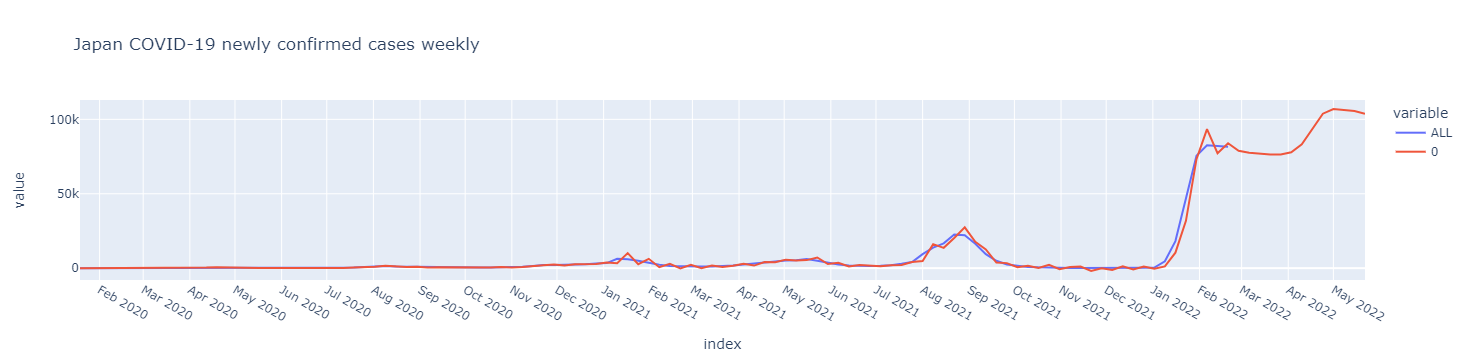

In [12]:
ts_forecast = result_all.predict(start=df_gr.index[0], end=df_gr.index[-1]+relativedelta(months=3))

temp_df = df_gr.ALL.to_frame()
temp_df = pd.concat([temp_df, ts_forecast])
fig = px.line(temp_df, title='Japan COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()

## SARIMA - Tokyo

In [13]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.Tokyo, order=order, seasonal_order=seasonal_order)
result_tokyo = model.fit(disp=False)
result_tokyo.aic

1530.3119108655671

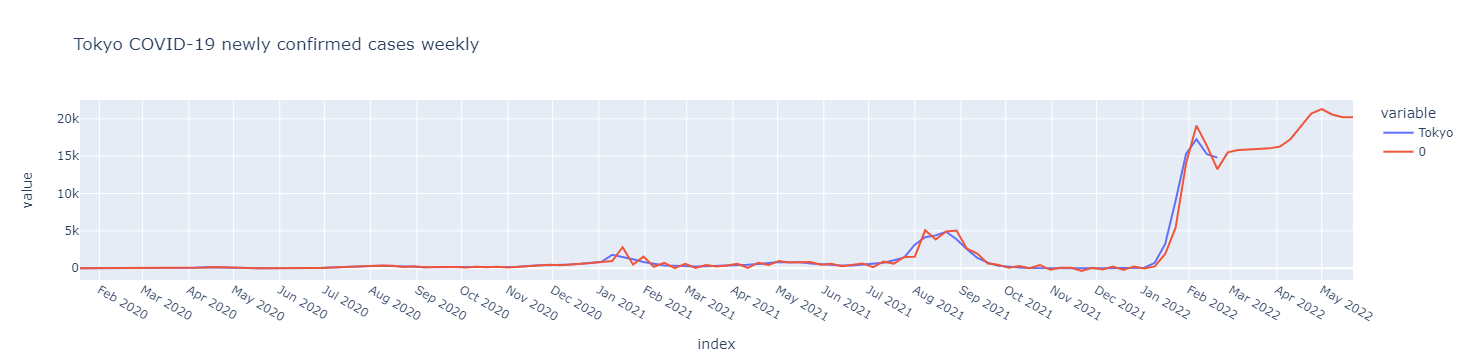

In [14]:
ts_forecast = result_tokyo.predict(start=df_gr.index[0], end=df_gr.index[-1]+relativedelta(months=3))
temp_df = df_gr.Tokyo.to_frame()
temp_df = pd.concat([temp_df, ts_forecast])

fig = px.line(temp_df, title='Tokyo COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()